# CHAPTER 1 
# The Machine Learning Landscape

## What is Machine Learning
Machine Learning is the science of programming algorithms that will get patterns and insights from data.

## Examples of Applications
- Image classification : Convolutional Neural Networks (CNNs)
- Detecting tumors in brain scans: semantic segmentation using CNNs
- Classifying news articles: CNNs, RNNs, or Transformers
- Creating a chatbot: NLP and NLU.
- Detecting credit card fraud
- Customer Segmentation based on their purchase: Clustering
- Building an intelligent bot for a game: Reinforcement Learning

## Types of Machine Learning Systems

### Supervised Learning
In supervised learning, each dataset observation comprises both the instance x(i) and its response y(i), also called the label.\
Here are some examples of supervised learning algorithms: k-nearest neighbors, Linear Regression, Logistic Regression, Support Vector Machines,
Decision Trees and Random Forests.

### Unsupervised Learning
In unsupervised learning, the training data is unlabeled. In other words, there is no target output y. \
A list of some unsupervided algorithms is: Clustering, Anomaly detection, and Dimensionnality reduction.


## Batch and Online Learning

### Batch learning

In batch learning, the system doesn't learn incrementally, instead the system is trained offline using the available data. \
To account for a new class of data, one need to train all the data, the old with the new ones from scratch. Then the system is launched into production for classification.

### Online learning


In online learning, the system can learn incrementally about new data as it arrives.

### **Example 1-1.** Training and running a linear model using Scikit-Learn


In [2]:
import sys
assert sys.version_info >= (3, 5)
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [3]:
# Scikit-Learn version
import sklearn
assert sklearn.__version__ >= "0.20"
print("sklearn.__version__:",sklearn.__version__)

sklearn.__version__: 1.5.1


The `datapath` where to load the dataset

In [7]:
import os
datapath = os.path.join('datasets', '')

In [8]:
# To plot pretty figure directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [9]:
# Download the data
import urllib.request
DOWNLAOD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print('Downlaoding', filename)
    url = DOWNLAOD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Downlaoding oecd_bli_2015.csv
Downlaoding gdp_per_capita.csv


Explore the data before operating the merge between gdp and oecd_bli data.

In [10]:
# Load the data
import pandas as pd
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values='n/a')
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [11]:
# Get only the data where INEQUALITY is 'TOT' Total.
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [12]:
oecd_bli[oecd_bli['Country']=='Australia']

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
109,AUS,Australia,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,20.00,NaN,NaN
218,AUS,Australia,HO_NUMR,Rooms per person,L,Value,TOT,Total,RATIO,Ratio,0,units,NaN,NaN,2.30,E,Estimated value
327,AUS,Australia,IW_HADI,Household net adjusted disposable income,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,31588.00,NaN,NaN
510,AUS,Australia,IW_HNFW,Household net financial wealth,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,47657.00,NaN,NaN
619,AUS,Australia,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,72.00,NaN,NaN
804,AUS,Australia,JE_JT,Job security,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,4.80,NaN,NaN
915,AUS,Australia,JE_LTUR,Long-term unemployment rate,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.08,NaN,NaN
1100,AUS,Australia,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,50449.00,NaN,NaN
1285,AUS,Australia,SC_SNTWS,Quality of support network,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,92.00,NaN,NaN


In [13]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [14]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [15]:
gdp_per_capita.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [16]:
gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)

Merge `oecd_bli` data with `gdp_per_capita`.

In [17]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats.head(2)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


In [18]:
full_country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Brazil to Luxembourg
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              36 non-null     float64
 1   Assault rate                               36 non-null     float64
 2   Consultation on rule-making                36 non-null     float64
 3   Dwellings without basic facilities         36 non-null     float64
 4   Educational attainment                     36 non-null     float64
 5   Employees working very long hours          36 non-null     float64
 6   Employment rate                            36 non-null     float64
 7   Homicide rate                              36 non-null     float64
 8   Household net adjusted disposable income   36 non-null     float64
 9   Household net financial wealth             36 non-null     float64
 10  Housing expenditure 

In [19]:
print(full_country_stats)

                 Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Brazil                    18.0           7.9                          4.0   
Mexico                    30.0          12.8                          9.0   
Russia                    15.0           3.8                          2.5   
Turkey                    35.0           5.0                          5.5   
Hungary                   15.0           3.6                          7.9   
Poland                    33.0           1.4                         10.8   
Chile                     46.0           6.9                          2.0   
Slovak Republic           13.0           3.0                          6.6   
Czech Republic            16.0           2.8                          6.8   
Estonia                    9.0           5.5                          3.3   
Greece                    27.0           3.7                          6.5   

In [20]:
print(full_country_stats[['GDP per capita', 'Life satisfaction']])

                 GDP per capita  Life satisfaction
Country                                           
Brazil                 8669.998                7.0
Mexico                 9009.280                6.7
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Chile                 13340.905                6.7
Slovak Republic       15991.736                6.1
Czech Republic        17256.918                6.5
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336

The function to merge  IMF's Gross Domestic Product (GDP) data with OECD Life satisfaction data.

In [21]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    full_country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
    return full_country_stats


In [22]:
# Scikit-Learn linear model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values='n/a')

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head(7)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8


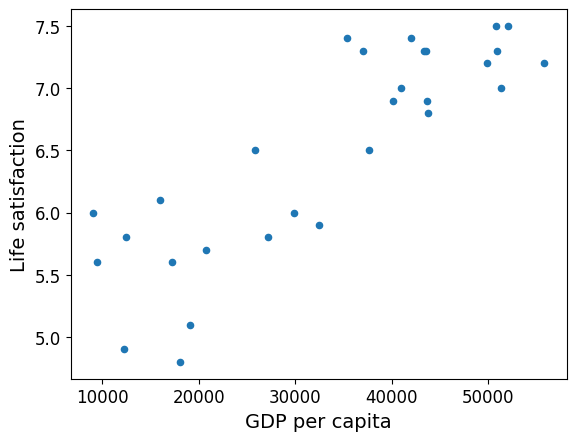

[[5.96242338]]


In [23]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]] # The GDP per capita of Cyprus
print(model.predict(X_new))

In [24]:
# Make a prediction for Mexico
X_new = [[9009.280]] # The GDP per capita of Mexico
print(model.predict(X_new))

[[5.2955476]]


## Main Challenges of Machine Learning

Regarding the 'data'
- Insufficient quantity of training data
- Non representative training data
- Poor quality of data

Regarding the 'algorithm'
- Overfitting\
The model perfoms well on the training data but fails when generalizing.\
A solution is to simplify the training model, or increasing the training data.